In [8]:
from utils.constants import myoutput_path
from utils.constants import sig_GMH5pp_dsids, region_labels
from utils.processing import get_merged_mc_df, logging_setup

import pandas as pd
import joblib
import numpy as np
import matplotlib.pyplot as plt
from utils.processing import attach_MCtypes
from utils.utils import save_fig

In [10]:
region = "SR"
logging_setup(verbosity=0, if_write_log=False, output_path=None)

df_SR = df_samples_folder = myoutput_path / "merged_gz" / region
bkg_df_SR = attach_MCtypes(get_merged_mc_df(df_SR))
sig_df_SR = attach_MCtypes(get_merged_mc_df(df_SR, mc_type="sig"))

In [9]:
region = "CRlowMjj"
logging_setup(verbosity=0, if_write_log=False, output_path=None)

df_CRlowMjj = df_samples_folder = myoutput_path / "merged_gz" / region
bkg_df_CRlowMjj = attach_MCtypes(get_merged_mc_df(df_CRlowMjj))
sig_df_CRlowMjj = attach_MCtypes(get_merged_mc_df(df_CRlowMjj, mc_type="sig"))

In [11]:
sig_m200_df_SR = sig_df_SR[sig_df_SR["mc_subtype"] == "m200"]
sig_m200_df_CRlowMjj = sig_df_CRlowMjj[sig_df_CRlowMjj["mc_subtype"] == "m200"]

In [12]:
# Before the Mjj cut

N_s = sig_m200_df_SR.weight.sum() + sig_m200_df_CRlowMjj.weight.sum()
N_b = bkg_df_SR.weight.sum() + bkg_df_CRlowMjj.weight.sum()

N_s / np.sqrt(N_s + N_b)

11.615704344550087

In [13]:
# after the Mjj cut

N_s = sig_m200_df_CRlowMjj.weight.sum()
N_b = bkg_df_CRlowMjj.weight.sum()

N_s / (N_s + N_b)

0.19536473005453267

In [14]:
# after the Mjj cut

N_s = sig_m200_df_SR.weight.sum()
N_b = bkg_df_SR.weight.sum()

N_s / (N_s + N_b)

0.42347748004504715

In [15]:
sig_m200_df_CRlowMjj.weight.sum()

69.21477252633804

In [16]:
import mplhep as hep

hep.style.use(hep.style.ATLAS)
mjj_bin = np.linspace(200, 3000, 51)

In [ ]:
groups_sig_df_SR = sig_df_SR.groupby("mc_subtype")
groups_sig_df_CRlowMjj = sig_df_CRlowMjj.groupby("mc_subtype")

for name, group in groups_sig_df_SR:
    fig, ax = plt.subplots(1, 1, figsize=(8, 8))
    _sig_df_SR = group
    _sig_df_CRlowMjj = groups_sig_df_CRlowMjj.get_group(name)

    ax.hist(
        [_sig_df_SR["Mjj"] / 1000, bkg_df_SR["Mjj"] / 1000],
        weights=[_sig_df_SR["weight"], bkg_df_SR["weight"]],
        bins=mjj_bin,
        label=["sig, SR", "bkg, SR"],
        stacked=True,
    )

    # for CRlowMjj
    ax.hist(
        [_sig_df_CRlowMjj["Mjj"] / 1000, bkg_df_CRlowMjj["Mjj"] / 1000],
        weights=[_sig_df_CRlowMjj["weight"], bkg_df_CRlowMjj["weight"]],
        bins=mjj_bin,
        label=["sig, CRlowMjj", "bkg, CRlowMjj"],
        stacked=True,
    )

    ax.legend()
    ax.set_xlabel("Mjj [GeV]")
    ax.set_ylabel("Weighted Yields")
    ax.set_title(f"Mjj distribution in SR and CRlowMjj, H5 {name} GeV")

    save_fig(fig, "SRvsCR/", f"SRvsCR_{name}_Mjj")
    plt.close()

In [40]:
sig_contamination = sig_df_CRlowMjj.groupby("mc_subtype")["weight"].sum() / bkg_df_CRlowMjj["weight"].sum()

In [47]:
sig_contamination = sig_contamination.loc[ordered_mass].copy()

In [54]:
sig_contamination.min()

4.779782092351279e-05

(0.0, 0.3)

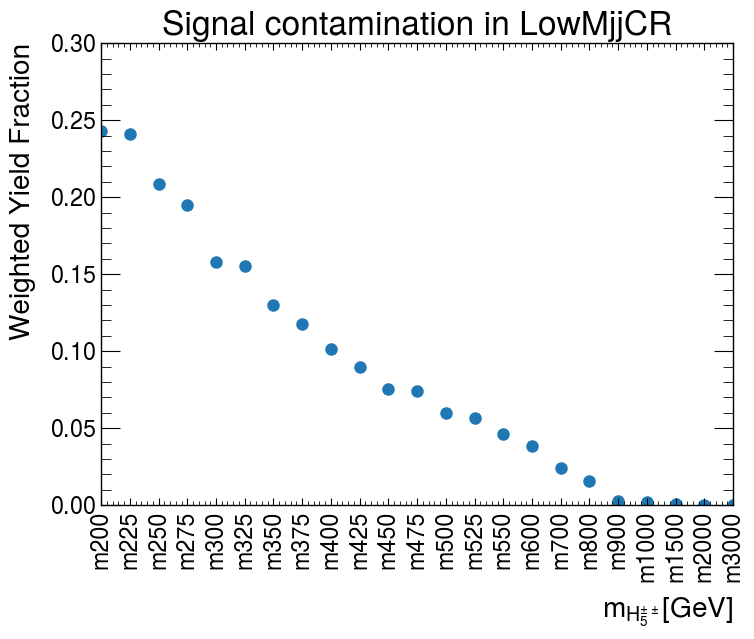

In [57]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.plot(sig_contamination, "o")
ax.tick_params(axis="x", rotation=90)
ax.set_xlabel(r"$\mathrm{m_{\mathrm{H}_{5}^{\pm \pm}} [GeV]} $")
ax.set_ylabel("Weighted Yield Fraction")
ax.set_title("Signal contamination in LowMjjCR")
ax.set_ylim(0, 0.3)